In [2]:
# Importing and installing from our private package
! pip install git+https://github.com/firekind/athena

  Cloning https://github.com/firekind/athena to /tmp/pip-req-build-7s9snv4c
  Running command git clone -q https://github.com/firekind/athena /tmp/pip-req-build-7s9snv4c
  Created wheel for athena: filename=athena-0.0.1-cp36-none-any.whl size=29405 sha256=210b27e3b7dc3c1e0ff1de3cb4a8bcd4fcaa694ac278d838eb58bbcc6e18caff
  Stored in directory: /tmp/pip-ephem-wheel-cache-5bnh3_rd/wheels/36/d3/7b/d9500a9af2498abc5d48d60c7db37c1456ee745049da352e0b
Successfully built athena


In [3]:
# Importing libraries
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR

from athena import Experiment, ClassificationSolver, datasets
from athena.models import ResNet18
from athena.utils.functions import plot_experiments, plot_misclassified

In [4]:
# Configuring device
device = "cuda" if torch.cuda.is_available() else "cpu"
batch_size = 128 if torch.cuda.is_available() else 64
epochs = 30

In [5]:
# Calling Data Loader
train_loader = datasets.cifar10(batch_size=batch_size, use_default_transforms=True)
test_loader = datasets.cifar10(train=False, batch_size=batch_size, use_default_transforms=True)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
exps = (
    Experiment("ResNet-18 with Cross Entropy Loss")
    .model(ResNet18())
    .solver(ClassificationSolver)
        .optimizer(optim.SGD, lr=0.01, momentum=0.9)
        .scheduler(StepLR, step_size=100, gamma=0.1)
        .epochs(epochs)
        .train_loader(train_loader)
        .test_loader(test_loader)
        .loss_fn(F.cross_entropy)
        .device(device)
        .build()
    .build()
)

exps.run()



=> Running experiment: ResNet-18 with Cross Entropy Loss
Epoch: 1 / 30
391/391 [==============================] - 62s 159ms/step - loss: 1.2997 - accuracy: 52.7400
Test set: Average loss: 1.0539, Accuracy: 6418/10000 (64.18%)

Epoch: 2 / 30
391/391 [==============================] - 62s 158ms/step - loss: 0.7465 - accuracy: 73.8540
Test set: Average loss: 0.7911, Accuracy: 7291/10000 (72.91%)

Epoch: 3 / 30
391/391 [==============================] - 62s 160ms/step - loss: 0.5155 - accuracy: 82.1180
Test set: Average loss: 0.6550, Accuracy: 7797/10000 (77.97%)

Epoch: 4 / 30
391/391 [==============================] - 62s 160ms/step - loss: 0.3659 - accuracy: 87.2580
Test set: Average loss: 0.7716, Accuracy: 7648/10000 (76.48%)

Epoch: 5 / 30
391/391 [==============================] - 63s 160ms/step - loss: 0.2553 - accuracy: 91.0940
Test set: Average loss: 0.7907, Accuracy: 7679/10000 (76.79%)

Epoch: 6 / 30
391/391 [==============================] - 63s 160ms/step - loss: 0.1697 - accu

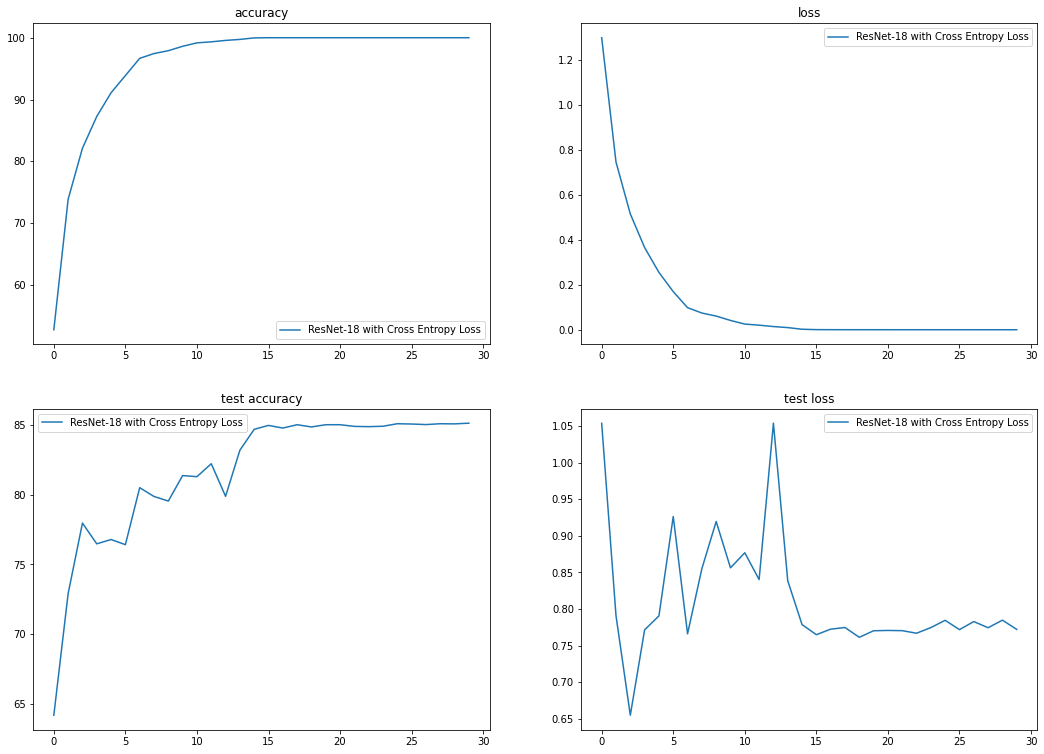

In [7]:
plot_experiments([exps])